# Using Pipeline class from Transformers Library


In [1]:
import pathlib
from transformers import pipeline
from PIL import Image
import matplotlib.pylab as plt
import numpy as np

In [2]:
from wrapper import list_of_models
model = list_of_models.get_models()

Parcing page 0
Parcing page 1
Parcing page 2
Parcing page 3
Parcing page 4
Parcing page 5
Parcing page 6
Parcing page 7
Parcing page 8


In [3]:
models = list(model)
models = models[0:5]

#### Extract all the images from our dataset and divide them into ground truths and unsegmented images.

In [4]:
imagepath = pathlib.Path('./Images/')
images = imagepath.glob('*')
inferred = []
GT = []
for image in images:
    if "GT" in image.name:
        GT.append(image)

    elif "GT" not in image.name and "ipy" not in image.name:
        inferred.append(image)
GT_paths = sorted(GT)
input_paths = sorted(inferred)




# Test the generated mask with ground truth using SEE-Segment

In [5]:
import sys
sys.path.append('/Users/ishasharma/Desktop/SEE Git/see-segment/')

In [6]:
from see import Segment_Fitness as sf

/Users/ishasharma/anaconda3/lib/python3.10/site-packages/transformers/models/segformer/feature_extraction_segformer.py:28: FutureWarning: The class SegformerFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use SegformerImageProcessor instead.
  warnings.warn(


trivial solution


trivial solution


Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.
/Users/ishasharma/anaconda3/lib/python3.10/site-packages/transformers/models/segformer/image_processing_segformer.py:99: FutureWarning: The `reduce_labels` parameter is deprecated and will be removed in a future version. Please use `do_reduce_labels` instead.
  warnings.warn(


trivial solution


Gave error


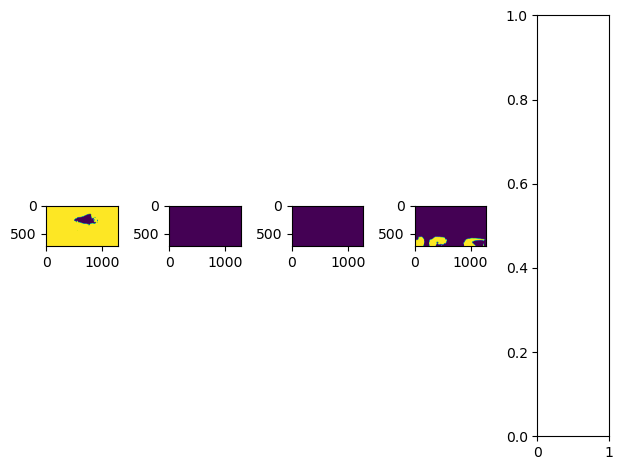

trivial solution
trivial solution


Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.


trivial solution
trivial solution
Gave error


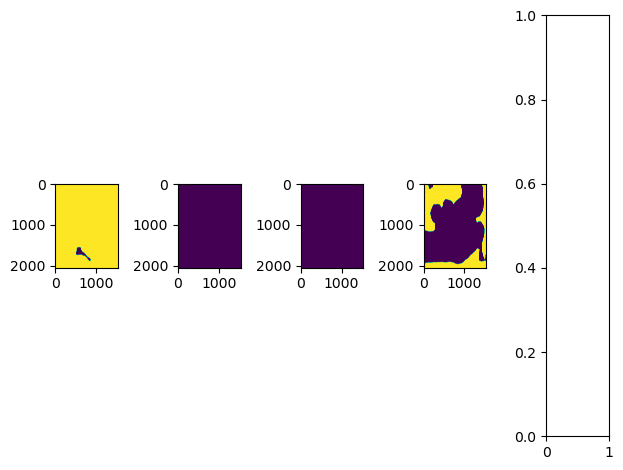

trivial solution


Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.


trivial solution
trivial solution
Gave error


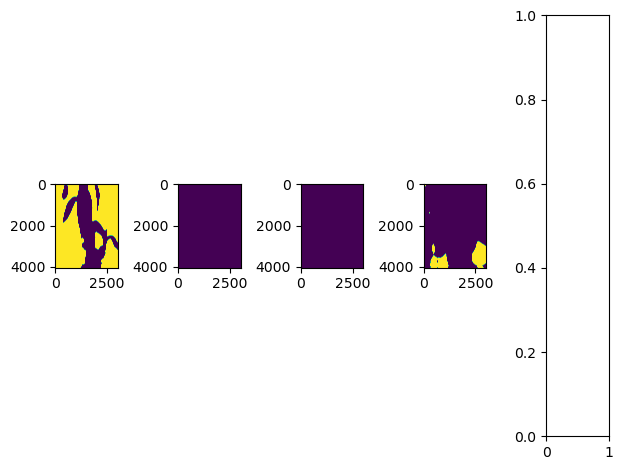

trivial solution
trivial solution


Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.


trivial solution
Gave error


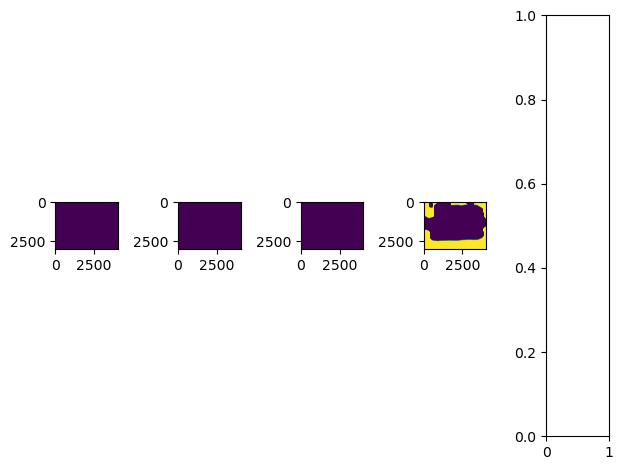

trivial solution
trivial solution


Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.


trivial solution
trivial solution
Gave error


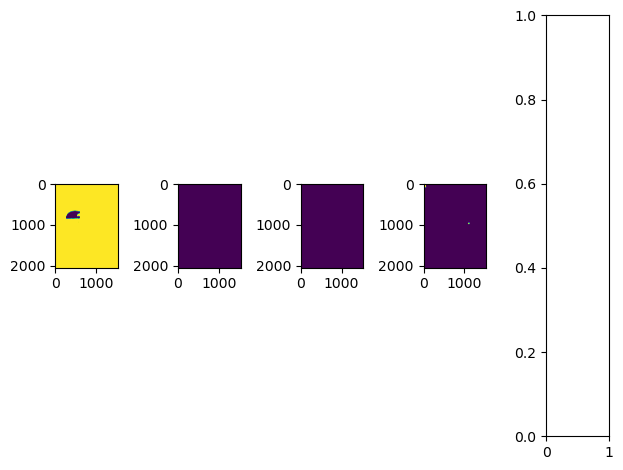

trivial solution
trivial solution


Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.


trivial solution
trivial solution
Gave error


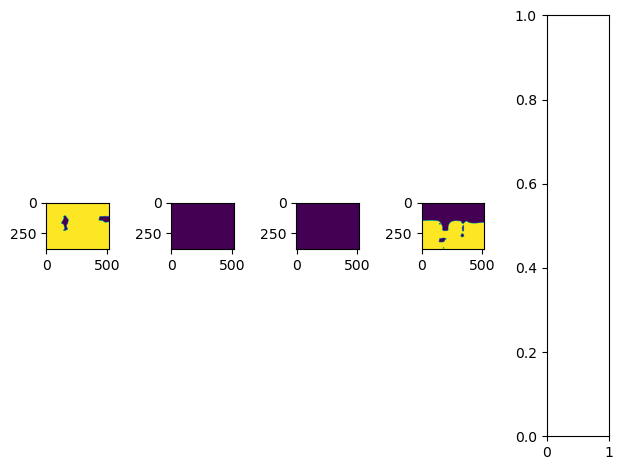

trivial solution
trivial solution


Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.


trivial solution
Gave error


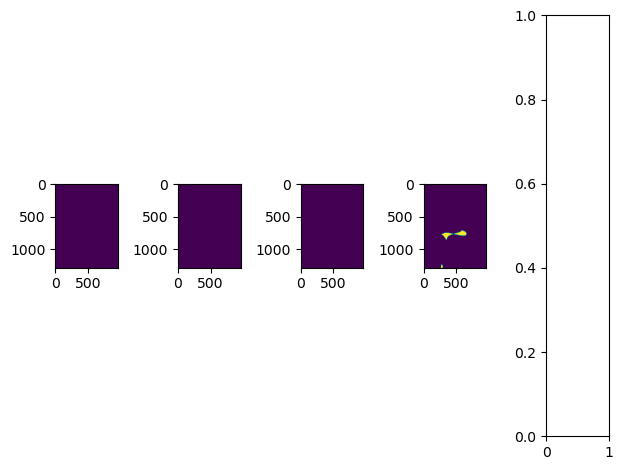

trivial solution
trivial solution


Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.


trivial solution
trivial solution
Gave error


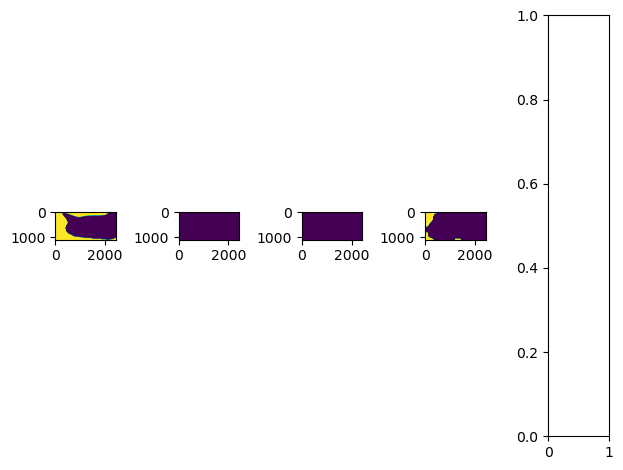

trivial solution
trivial solution
trivial solution


Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.


trivial solution
Gave error


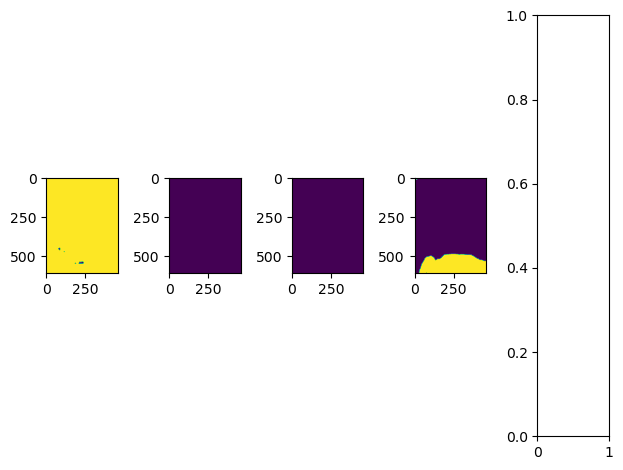

In [7]:
fitness_table = []
for image_path, GT_path in zip(input_paths, GT_paths):
    
    image = Image.open(image_path).convert("RGB")
    
    # NOTE TO DIRK, why does adding [:,:,0] change the fitness?
    GT_image = np.array(Image.open(GT_path).convert("RGB"))[:,:,0]
    
    # Create subplots for each model's segmented image
    fig, axs = plt.subplots(1, len(models))
    
    fitness = []
    # Iterate over the models and display segmented images
    
    for i, model_name in enumerate(models):
        # Initialize an image segmentation pipeline
        try:
            segmentation_pipeline = pipeline("image-segmentation", model=model_name)
            outputs = segmentation_pipeline(image)
            inferred_segmentation = outputs[0]['mask']

            # Display the segmented image in the corresponding subplot
            ax = axs[i] if len(models) > 1 else axs
            ax.imshow(inferred_segmentation)
            fit = sf.FitnessFunction(np.array(inferred_segmentation), GT_image)
            fitness.append(fit[0])
        except:
            fitness.append("NaN")
            print("Gave error")
    fitness_table.append(fitness)

        # Adjust the layout to avoid overlapping images
    fig.tight_layout()

        # Show the figure for the current image
    plt.show()
  

In [8]:
import pandas as pd

In [9]:
df = pd.DataFrame(fitness_table, index = inferred, columns = models)
df.index.names = ["Images"]
pd.options.display.float_format = '{:.3f}'.format
df

,google/deeplabv3_mobilenet_v2_1.0_513,vhug/segformer-b0-finetuned-xorder-dish-segmentation-trial,Efferbach/mobilenet_v2_1-10k-steps,nielsr/sidewalk-semantic-demo,Narsil/pet-segmentation
Images,,,,,
Images/Street.png,0.084,1.500,1.500,1.500,NaN
Images/bread.jpg,1.500,1.500,1.500,1.500,NaN
Images/Bambooplant.jpg,1.003,1.500,1.500,1.500,NaN
Images/a_walk_in_the_park.jpg,1.500,1.500,1.500,1.003,NaN
Images/Books.jpg,1.500,1.500,1.500,1.500,NaN
Images/Airpods.JPEG,1.500,1.500,1.500,1.500,NaN
Images/Mushrooms.jpeg,1.500,1.500,1.500,1.005,NaN
Images/AA_Chameleon.jpg,1.500,1.500,1.500,1.500,NaN
Images/trump.png,1.500,1.500,1.500,1.500,NaN
